In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('final_dataset_encoded.csv', low_memory=False)

df.set_index('academicYear', inplace=True)



## Lag Features

In [118]:
df['lag_baseRanking'] = df.groupby(['universityName_encoded', 'departmentName_encoded', 'scholarshipRate'])['baseRanking'].shift(1)
df['lag_baseRanking'] = df['lag_baseRanking'].fillna(df['baseRanking'])
df['lag_quota'] = df.groupby(['universityName_encoded', 'departmentName_encoded', 'scholarshipRate'])['quota'].shift(1)
df['lag_quota'] = df['lag_quota'].fillna(df['quota'])
df['lag_revenue'] = df.groupby(['universityName_encoded', 'departmentName_encoded', 'scholarshipRate'])['revenue'].shift(1)
df['lag_revenue'] = df['lag_revenue'].fillna(df['revenue'])

print(df.head())


   academicYear     idOSYM  scholarshipRate  quota  occupiedSlots  tuitionFee  \
0          2021  106510077              0.0     70             70         0.0   
1          2022  106510077              0.0     75             75         0.0   
2          2023  106510077              0.0     75             75         0.0   
3          2021  106510087              0.0     60             62         0.0   
4          2022  106510087              0.0     65             67         0.0   

   universityLocation  universityRegion  profCount  assoCount  ...  \
0                  41                 6        1.0        1.0  ...   
1                  41                 6        1.0        1.0  ...   
2                  41                 6        0.0        1.0  ...   
3                  41                 6        1.0        0.0  ...   
4                  41                 6        1.0        1.0  ...   

   language_Çince  language_İngilizce  language_İspanyolca  \
0               0             

## Year-over-Year Change Features

In [119]:
df['yoy_baseRanking'] = df['baseRanking'] - df['lag_baseRanking']
df['yoy_quota'] = df['quota'] - df['lag_quota']
df['yoy_revenue'] = df['revenue'] - df['lag_revenue']

print(df.head())


   academicYear     idOSYM  scholarshipRate  quota  occupiedSlots  tuitionFee  \
0          2021  106510077              0.0     70             70         0.0   
1          2022  106510077              0.0     75             75         0.0   
2          2023  106510077              0.0     75             75         0.0   
3          2021  106510087              0.0     60             62         0.0   
4          2022  106510087              0.0     65             67         0.0   

   universityLocation  universityRegion  profCount  assoCount  ...  \
0                  41                 6        1.0        1.0  ...   
1                  41                 6        1.0        1.0  ...   
2                  41                 6        0.0        1.0  ...   
3                  41                 6        1.0        0.0  ...   
4                  41                 6        1.0        1.0  ...   

   language_İtalyanca  universityName_encoded  departmentName_encoded  \
0                  

In [120]:
print(df.isnull().sum())

academicYear       0
idOSYM             0
scholarshipRate    0
quota              0
occupiedSlots      0
                  ..
lag_quota          0
lag_revenue        0
yoy_baseRanking    0
yoy_quota          0
yoy_revenue        0
Length: 73, dtype: int64


## Economic Features and Trends

In [121]:
# Lagging economic features
df['lag_inflation'] = df.groupby('academicYear')['inflation_by_year'].shift(1)
df['lag_growth_rate'] = df.groupby('academicYear')['growth_by_year'].shift(1)
df['lag_base_salary'] = df.groupby('academicYear')['base_salary_by_year'].shift(1)

df['lag_inflation'] = df['lag_inflation'].fillna(df['inflation_by_year'])
df['lag_growth_rate'] = df['lag_growth_rate'].fillna(df['growth_by_year'])
df['lag_base_salary'] = df['lag_base_salary'].fillna(df['base_salary_by_year'])

# Inflation-adjusted features
df['real_tuition_fee'] = df['tuitionFee'] / (1 + df['inflation_by_year'] / 100)
df['real_base_salary'] = df['base_salary_by_year'] / (1 + df['inflation_by_year'] / 100)

# Ratios and trends
df['tuition_to_salary_ratio'] = df['tuitionFee'] / df['base_salary_by_year']
df['growth_to_inflation_ratio'] = df['growth_by_year'] / df['inflation_by_year']
df['inflation_trend'] = df['inflation_by_year'] - df['lag_inflation']

# print(df.head())
print(df.isnull().sum())

academicYear                 0
idOSYM                       0
scholarshipRate              0
quota                        0
occupiedSlots                0
                            ..
real_tuition_fee             0
real_base_salary             0
tuition_to_salary_ratio      0
growth_to_inflation_ratio    0
inflation_trend              0
Length: 81, dtype: int64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

binary_features = [
    'universityType_devlet', 'universityType_vakıf', 'programType_DİL', 'programType_EA', 
    'programType_SAY', 'programType_SÖZ', 'language_Almanca', 'language_Arapça', 'language_Bulgarca', 'language_English', 
    'language_Ermenice', 'language_Fransızca', 'language_Korece', 'language_Lehçe', 'language_Rusça', 'language_Turkish', 
    'language_Türkçe', 'language_Çince', 'language_İngilizce', 'language_İspanyolca', 'language_İtalyanca', 
     'baseRanking' ,'idOSYM'
]
print(df[binary_features].describe().round(3))
print(len(binary_features))


       universityType_devlet  universityType_vakıf  programType_DİL  \
count              27687.000             27687.000        27687.000   
mean                   0.598                 0.402            0.051   
std                    0.490                 0.490            0.220   
min                    0.000                 0.000            0.000   
25%                    0.000                 0.000            0.000   
50%                    1.000                 0.000            0.000   
75%                    1.000                 1.000            0.000   
max                    1.000                 1.000            1.000   

       programType_EA  programType_SAY  programType_SÖZ  language_Almanca  \
count       27687.000        27687.000        27687.000         27687.000   
mean            0.320            0.456            0.173             0.004   
std             0.467            0.498            0.378             0.066   
min             0.000            0.000            0.

In [7]:

encoded_features = ['universityName_encoded', 'departmentName_encoded', 'facultyName_encoded']
print(df[encoded_features].describe().round(3))

numeric_features = []
for feature in df.columns:
    if feature not in binary_features:
        numeric_features.append(feature)
        
print(len(numeric_features))

       universityName_encoded  departmentName_encoded  facultyName_encoded
count               27687.000               27687.000            27687.000
mean                  266.489                 266.489              266.489
std                    83.229                 153.768              124.241
min                    40.175                   0.000                0.000
25%                   202.341                 142.345              159.310
50%                   274.235                 270.523              295.544
75%                   333.143                 396.597              325.321
max                   525.039                 969.993              767.799
43


In [8]:
skew_values = df[numeric_features].skew()

skew_features = skew_values[abs(skew_values) > 1.5].index.tolist()

print("Skewed Features:", skew_features)
print(len(skew_features))

continuous_features = [col for col in numeric_features if col not in skew_features]

print("Continous Features:", continuous_features)
print(len(continuous_features))

Skewed Features: ['quota', 'occupiedSlots', 'tuitionFee', 'profCount', 'assoCount', 'docCount', 'topRanking', 'stdDeviationStudents', 'revenue', 'totalPreference', 'top1PreferenceRatio', 'top9PreferenceRatio', 'top10AdmittedRatio', 'admittedGovPref', 'admittedPrivPref', 'admittedTotalPref', 'admittedTotalDepartmentPref', 'currentStudentCount', 'totalForeignStudents']
19
Continous Features: ['scholarshipRate', 'universityLocation', 'universityRegion', 'outOfCityStudentRate', 'sameRegionStudentRate', 'top3PreferenceRatio', 'avgOrderofPreference', 'avgAdmittedStudentPrefOrder', 'top1AdmittedRatio', 'top3AdmittedRatio', 'totalStudentNumber', 'Urap_Rank', 'Urap_Score', 'avg_monthly_income_group', 'Time_for_employment', 'employment_rate', 'base_salary_by_year', 'inflation_by_year', 'growth_by_year', 'avgAdmissionRanking', 'baseAdmissionRanking', 'universityName_encoded', 'departmentName_encoded', 'facultyName_encoded']
24


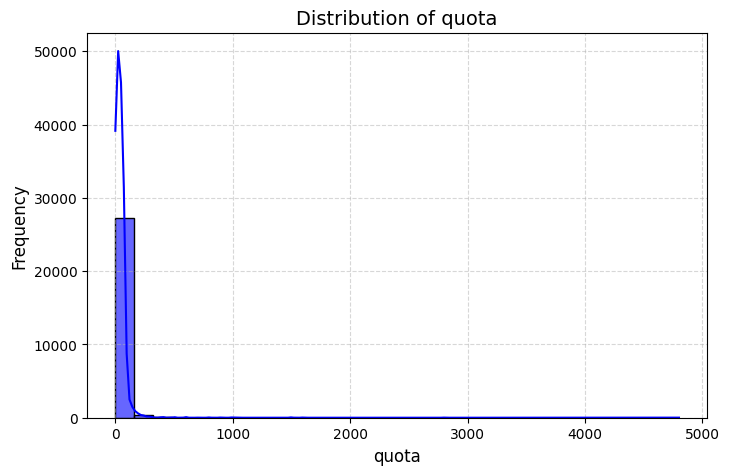

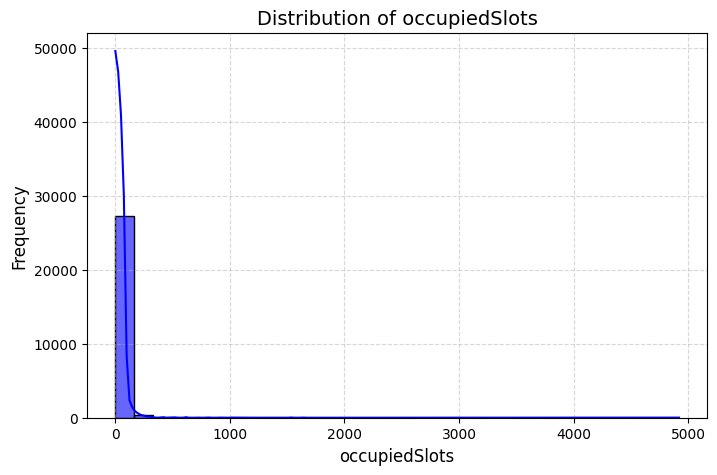

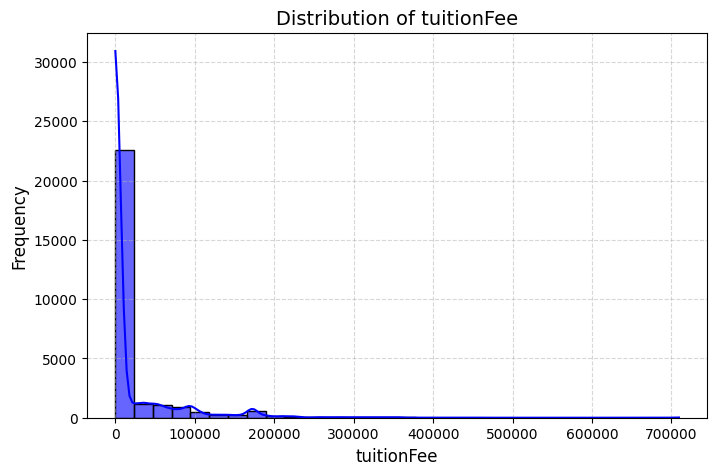

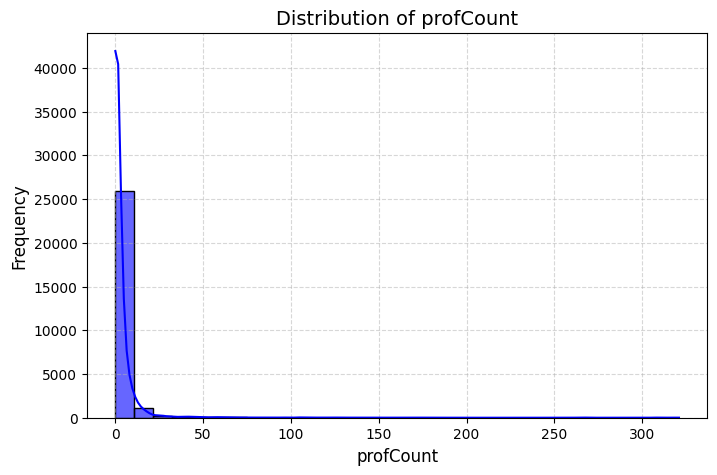

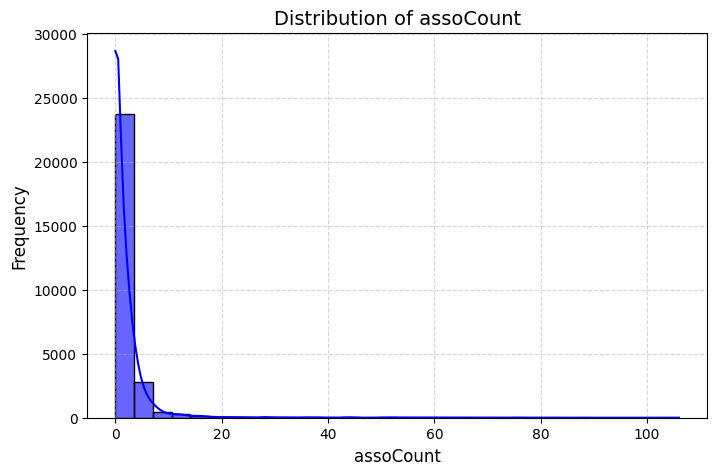

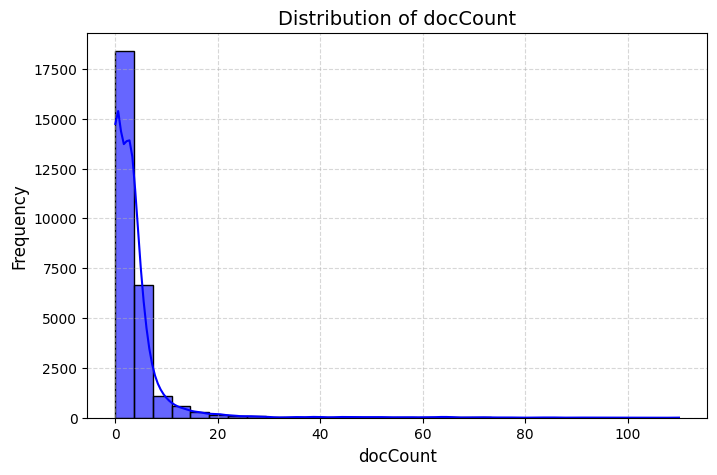

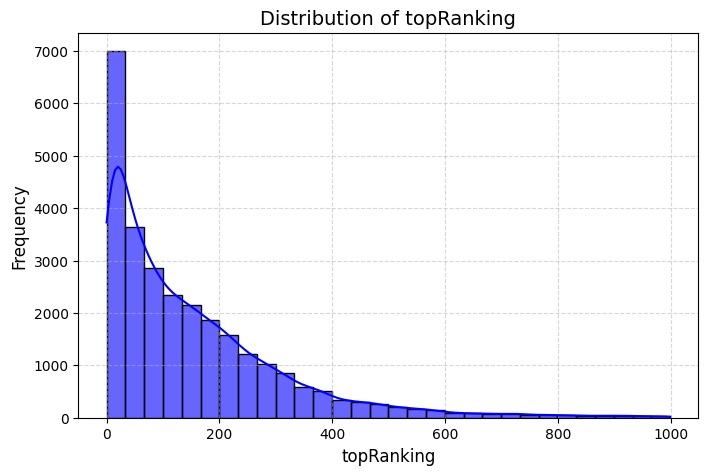

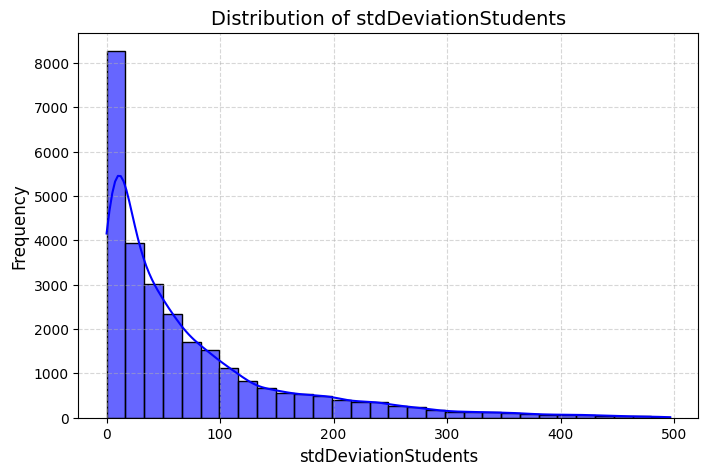

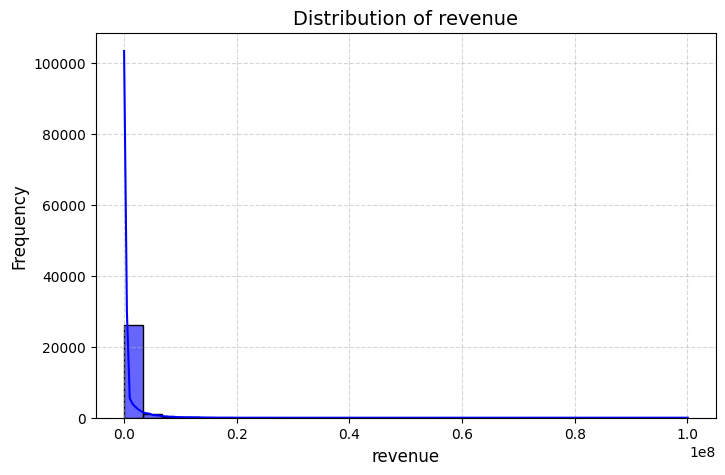

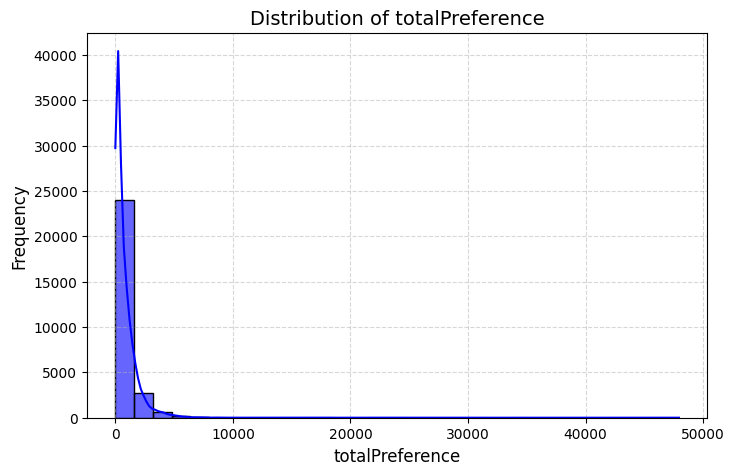

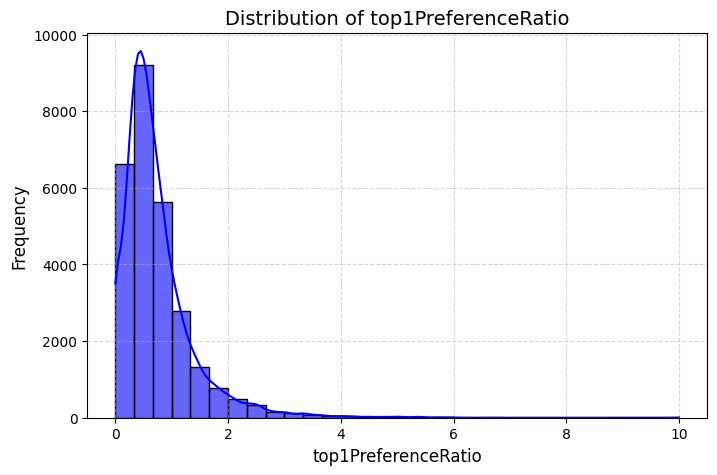

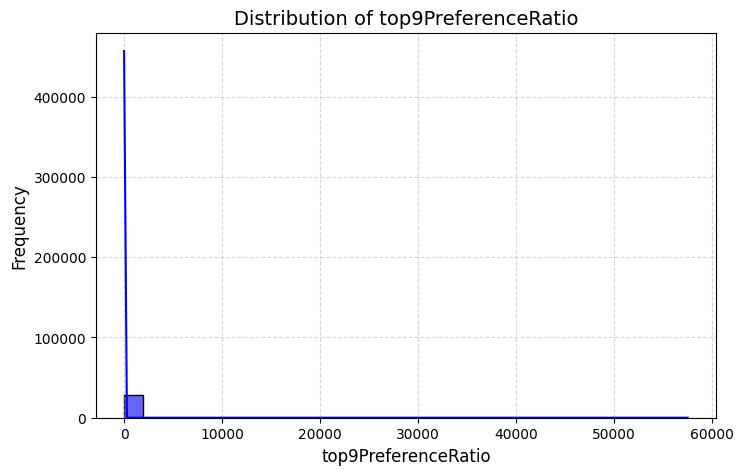

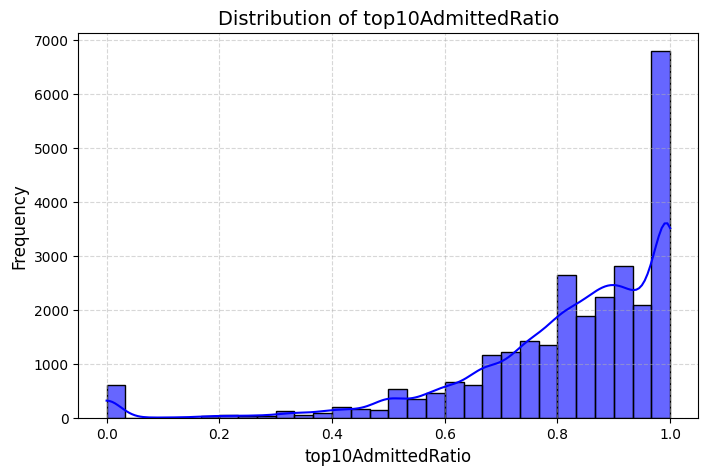

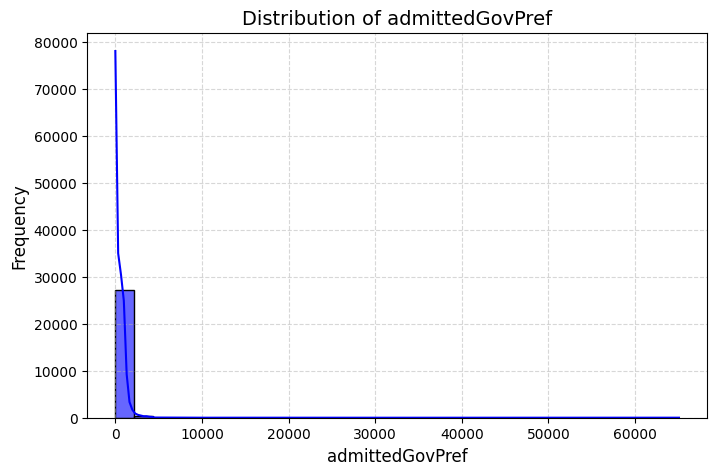

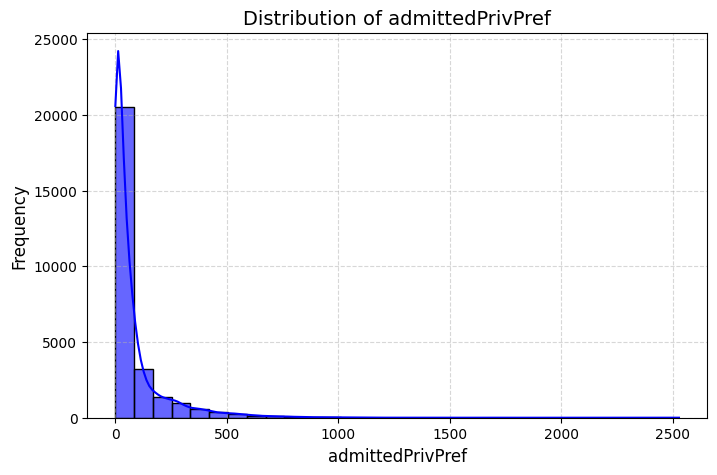

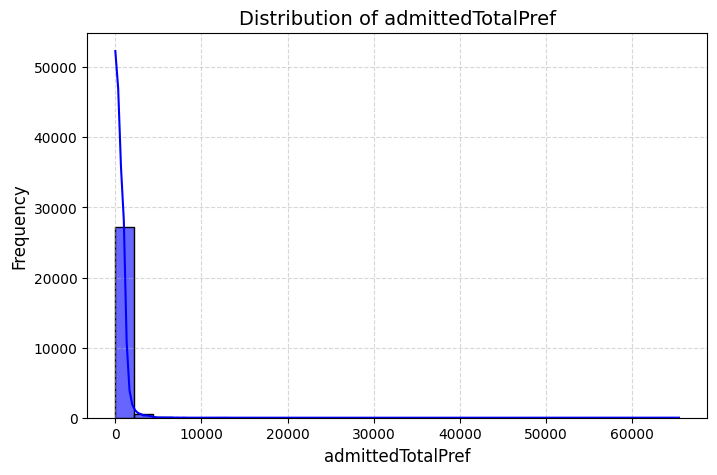

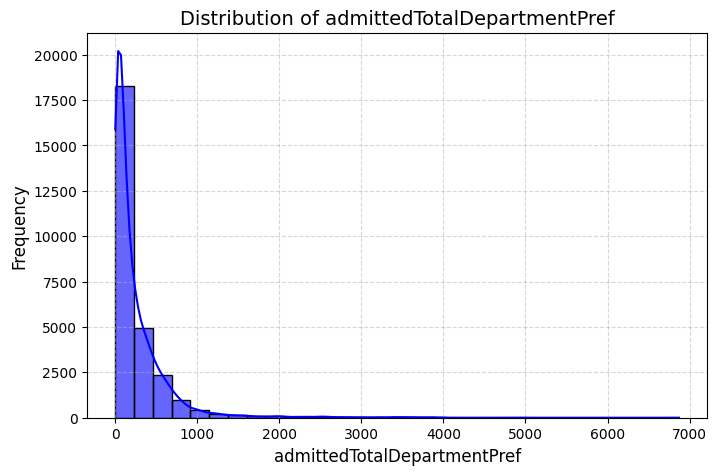

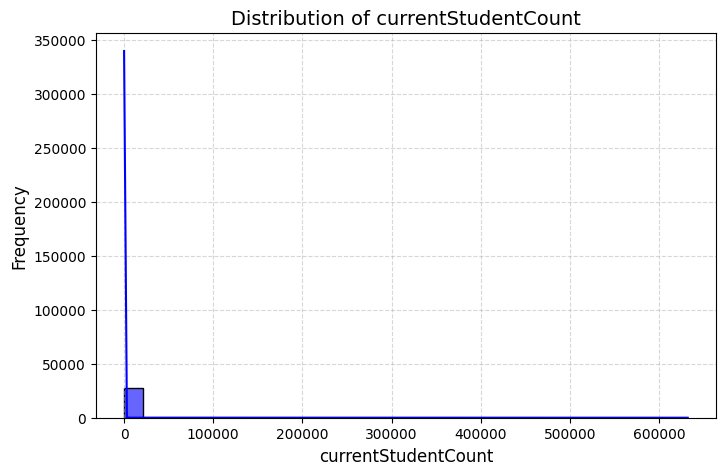

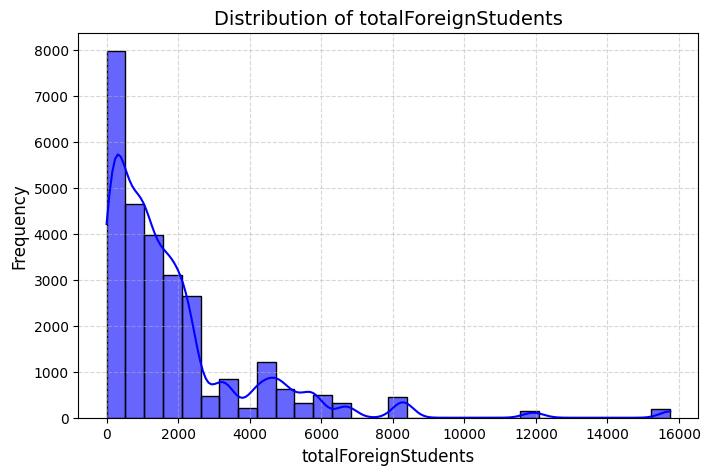

In [9]:
def plot_skewed_features(df, features):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[feature], kde=True, bins=30, color='blue', alpha=0.6)
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

plot_skewed_features(df, skew_features)

In [126]:
print(df.isnull().sum())

academicYear                 0
idOSYM                       0
scholarshipRate              0
quota                        0
occupiedSlots                0
                            ..
real_tuition_fee             0
real_base_salary             0
tuition_to_salary_ratio      0
growth_to_inflation_ratio    0
inflation_trend              0
Length: 81, dtype: int64


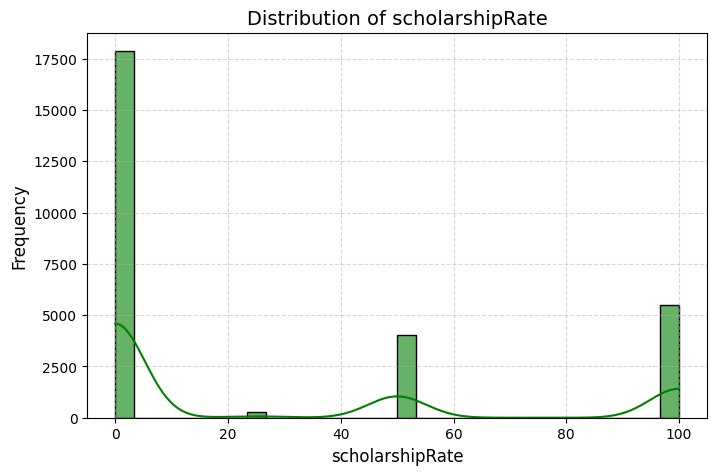

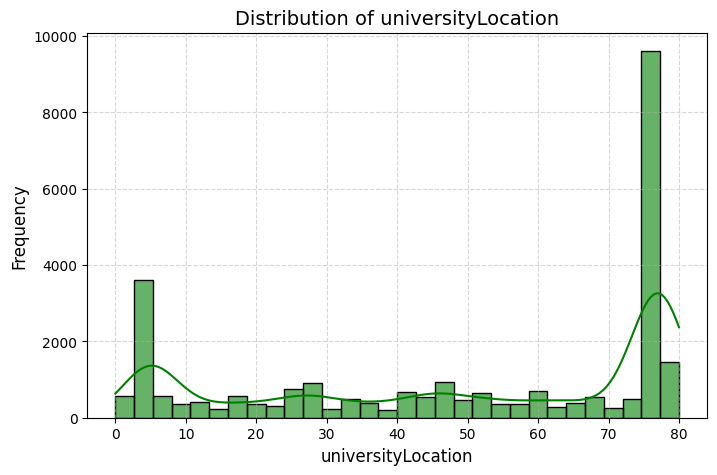

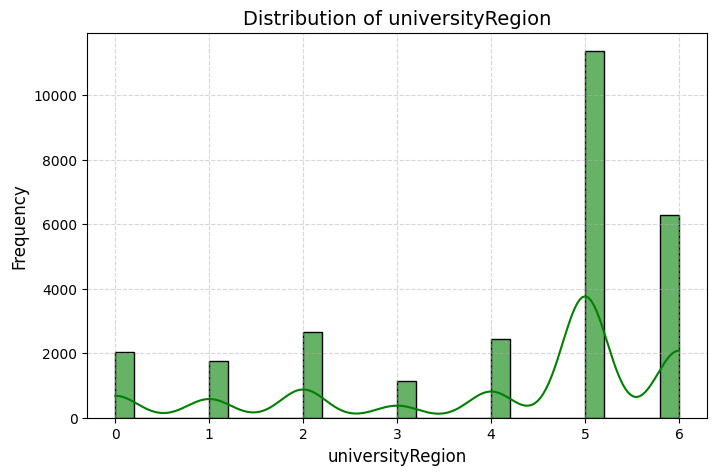

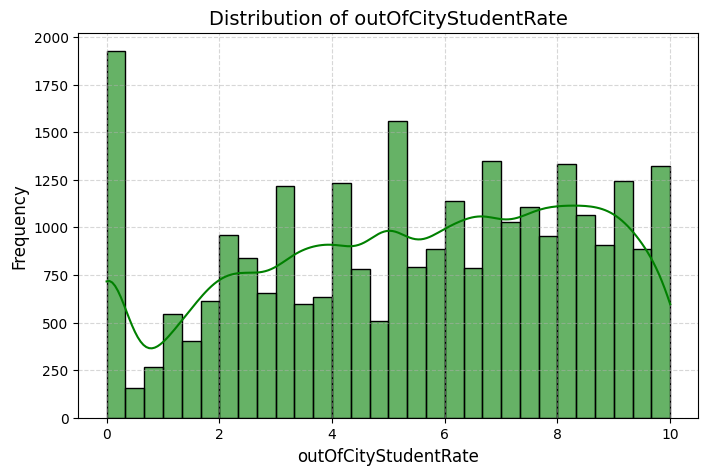

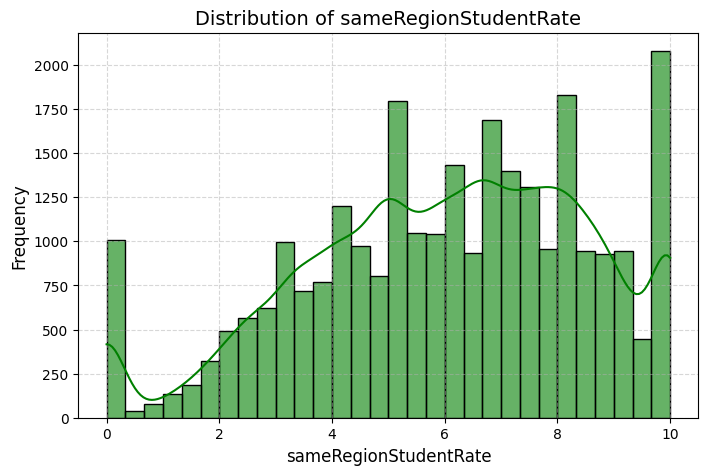

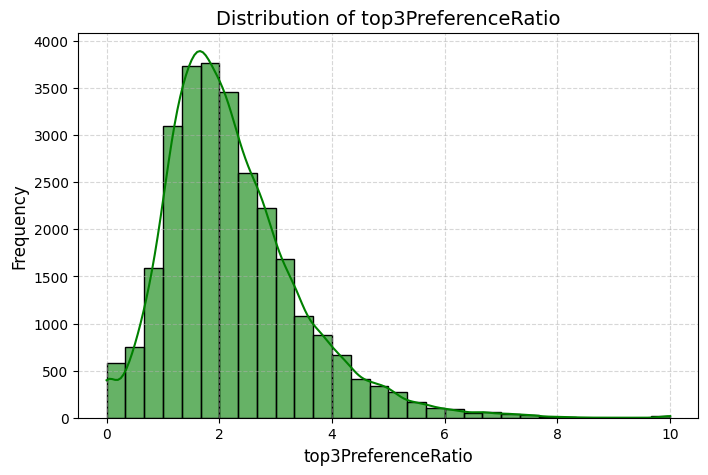

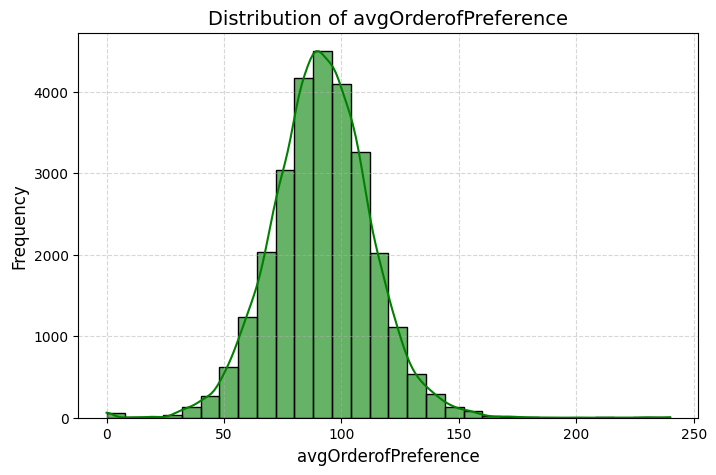

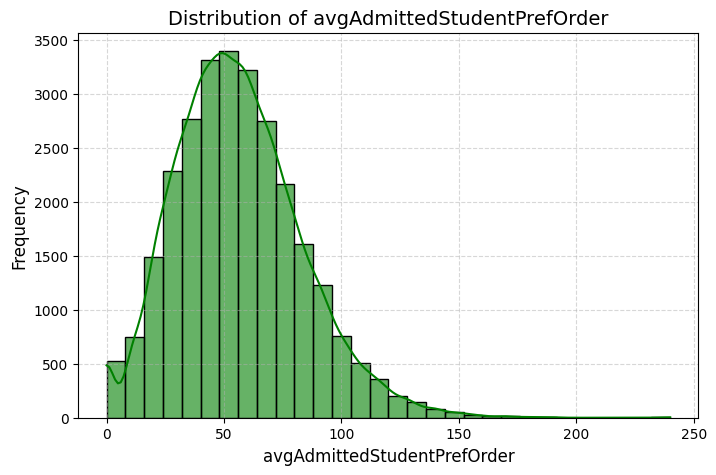

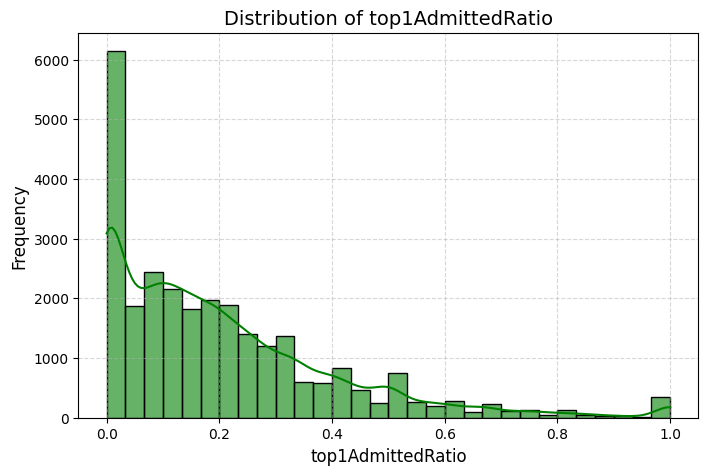

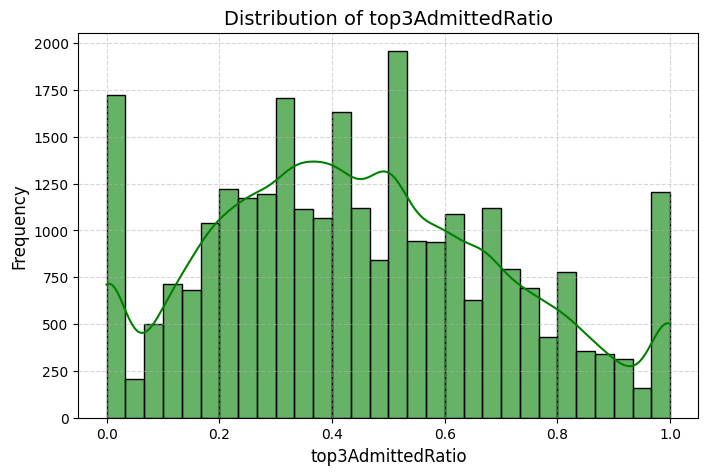

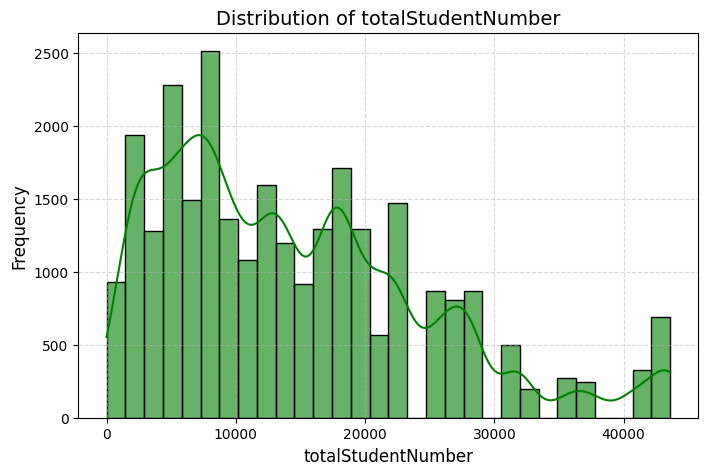

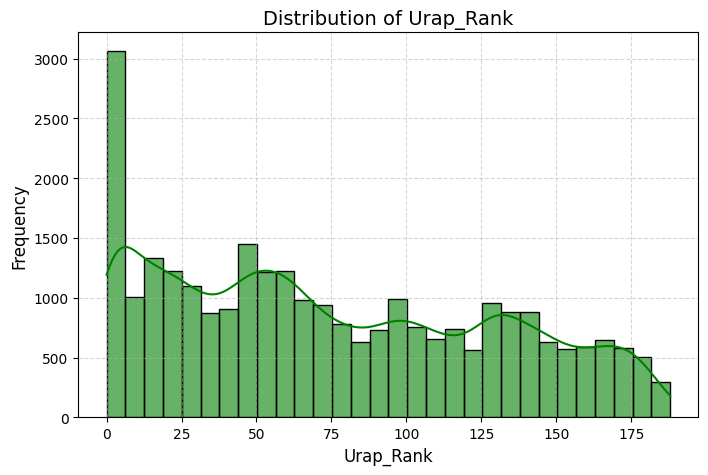

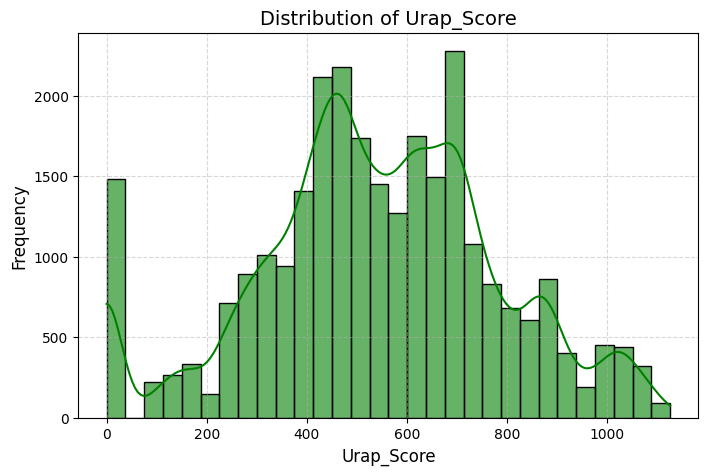

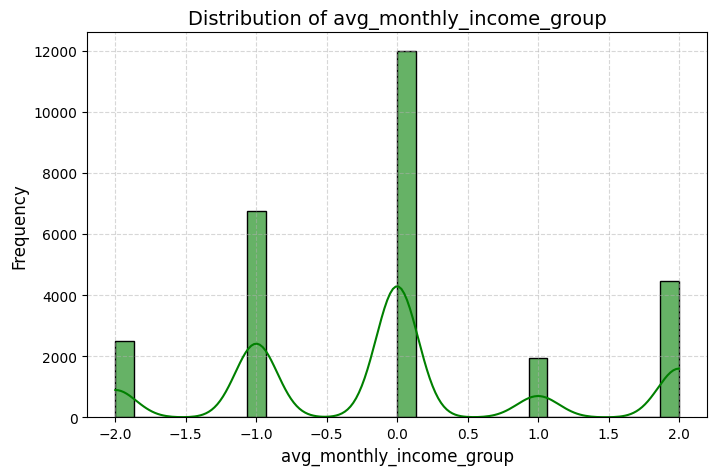

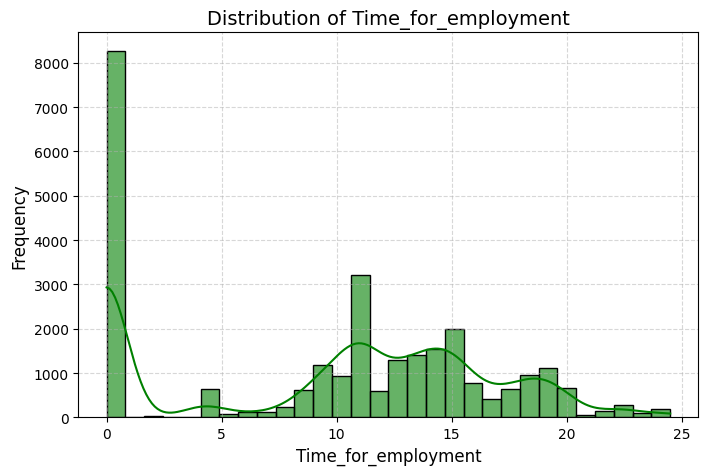

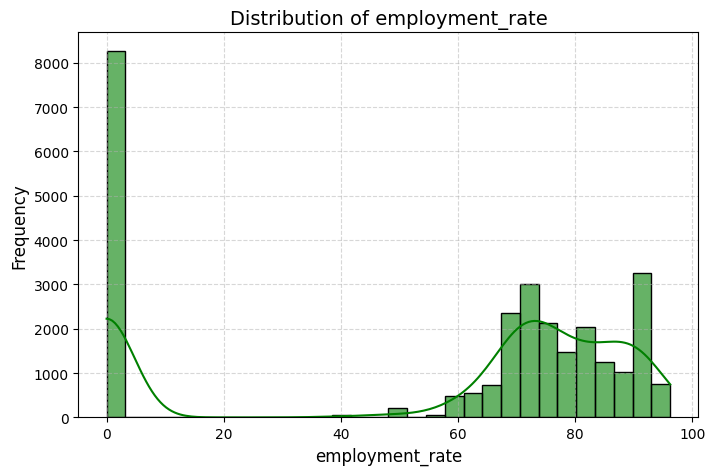

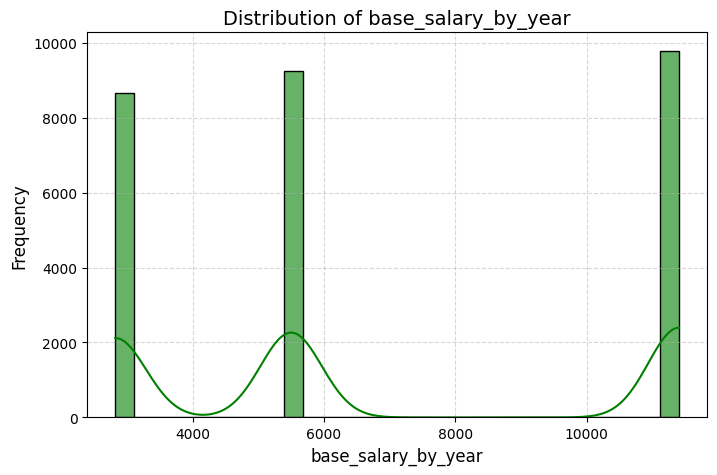

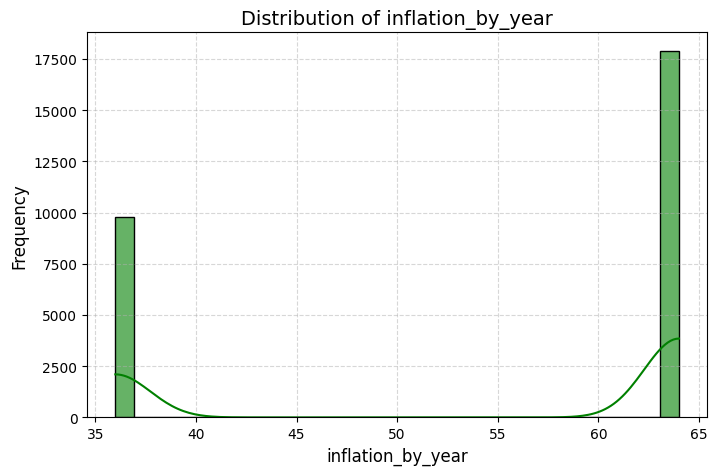

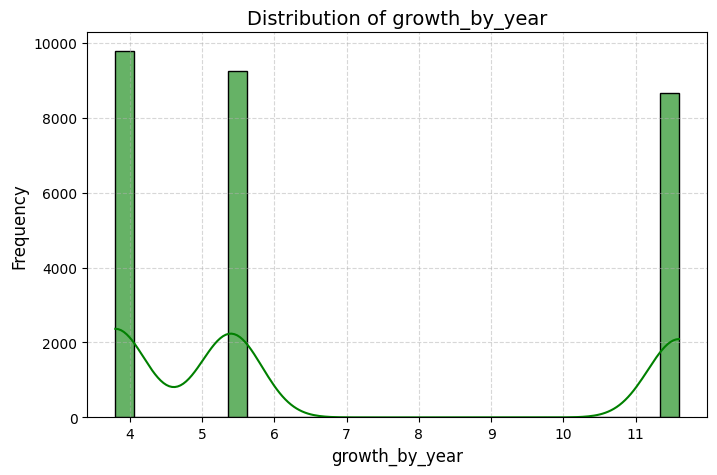

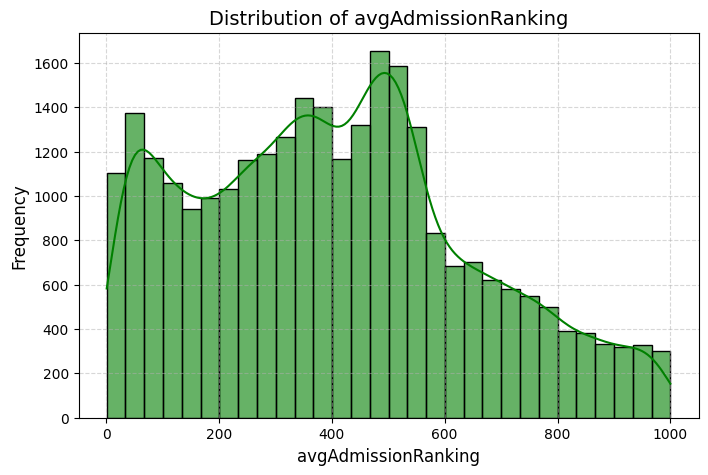

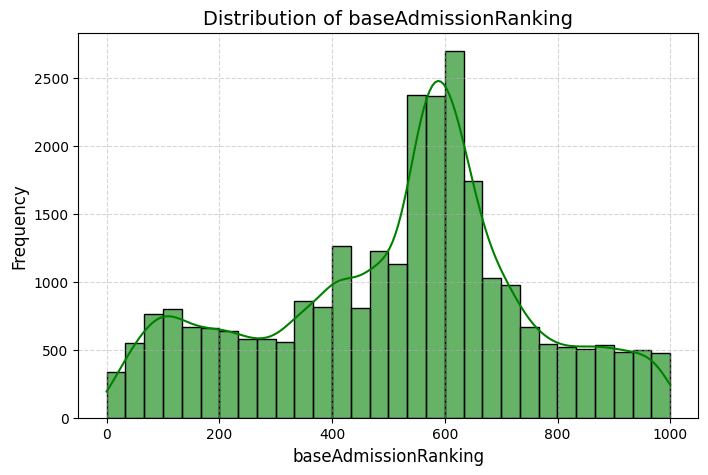

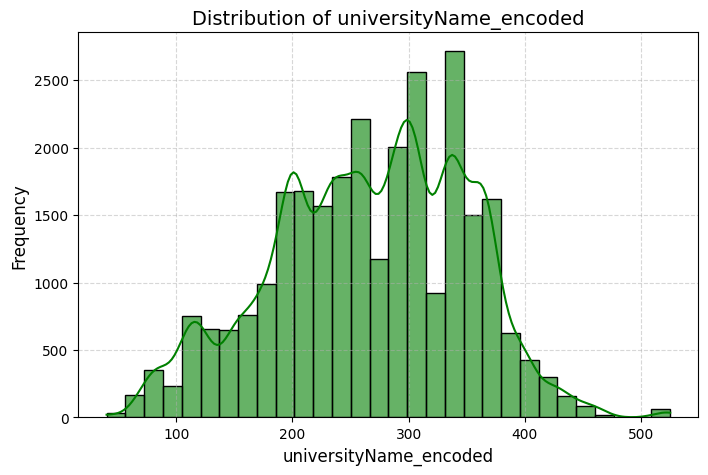

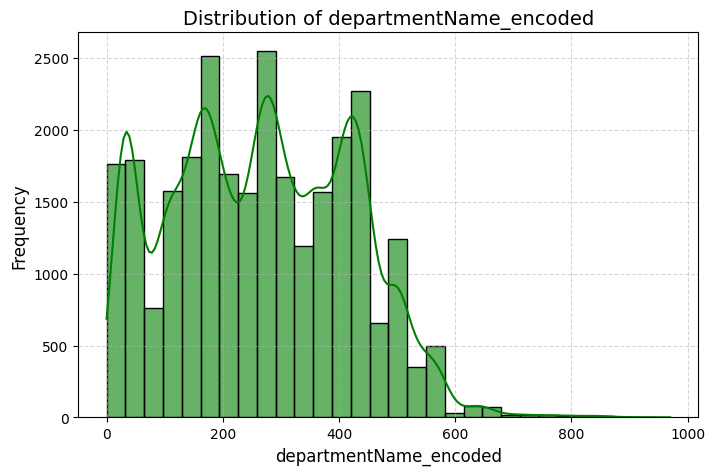

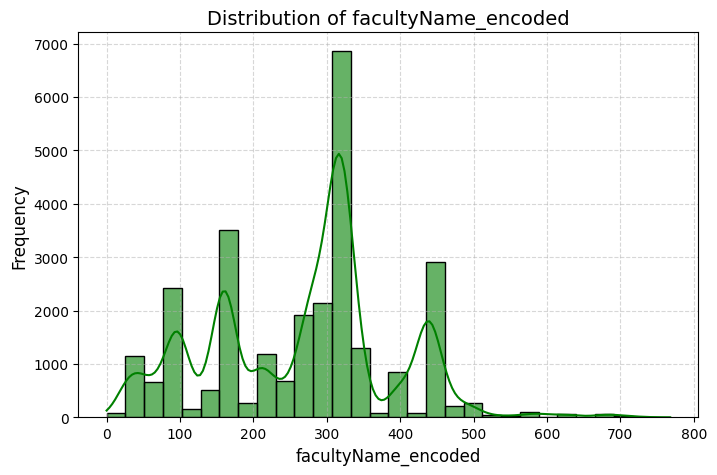

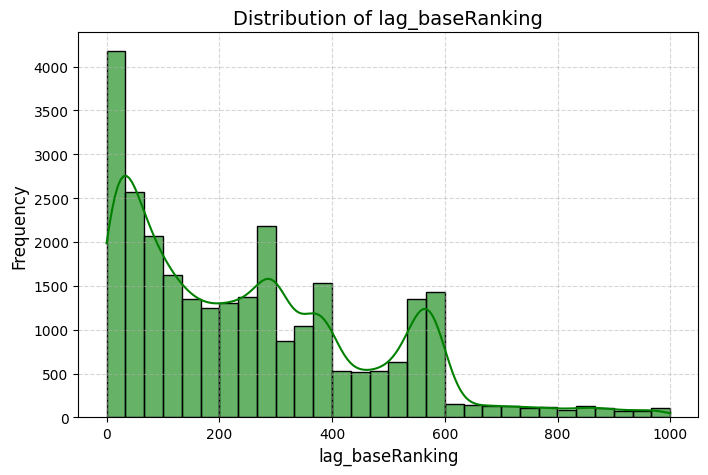

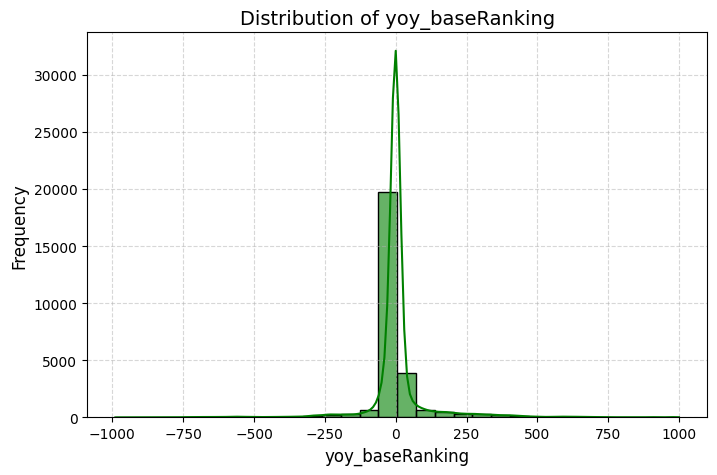

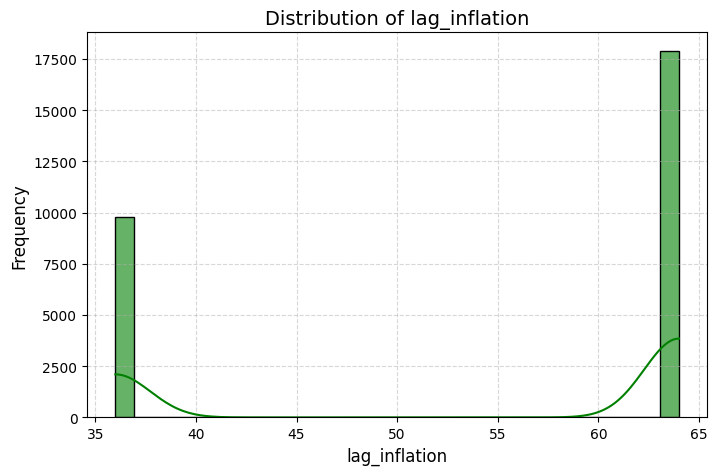

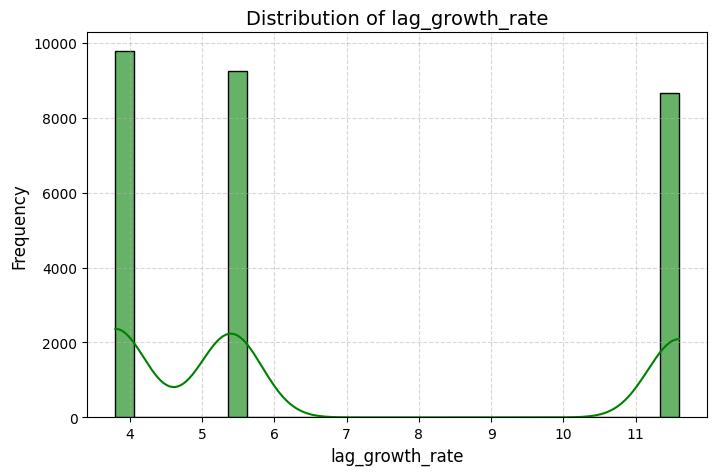

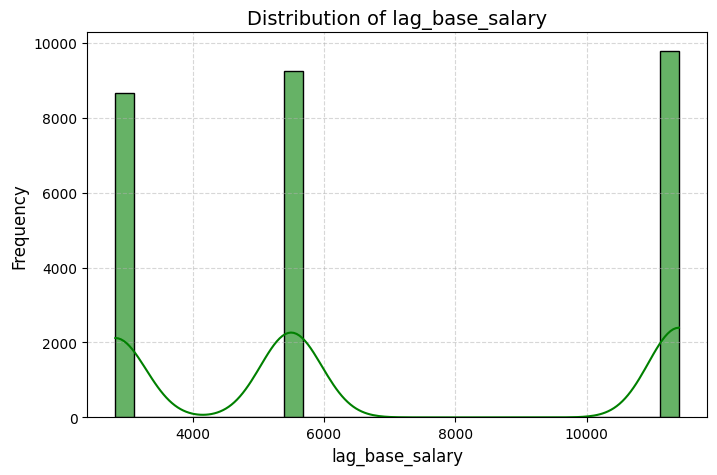

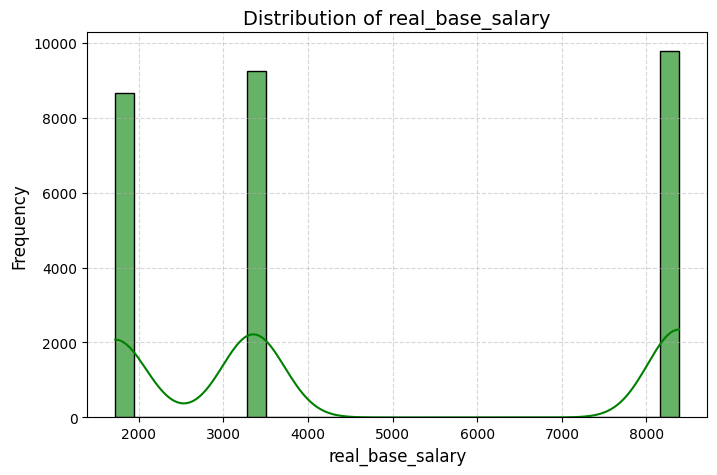

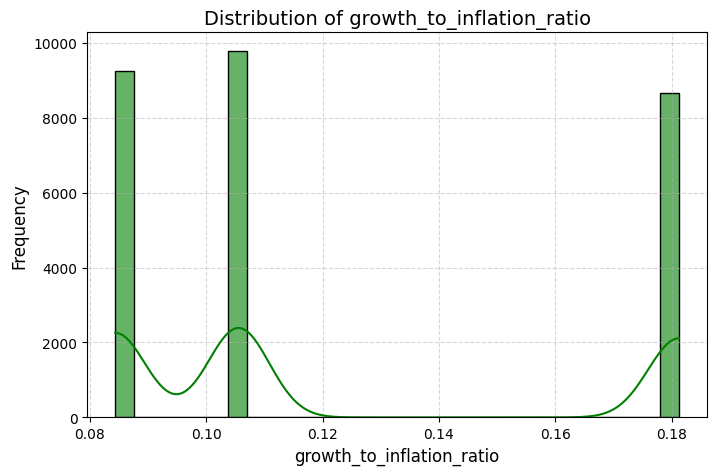

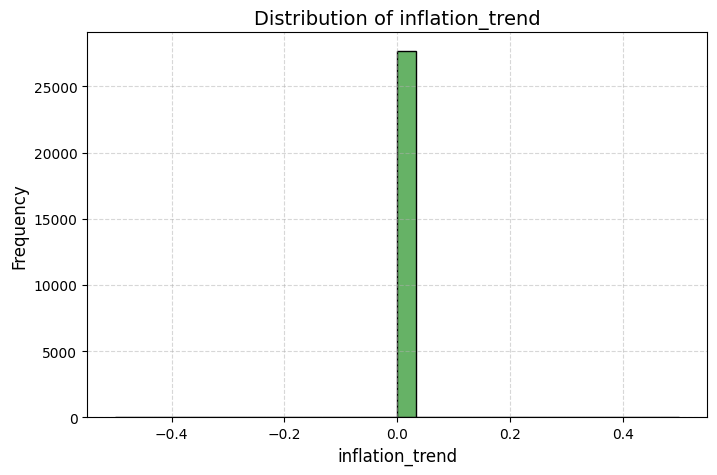

In [127]:
def plot_continuous_features(df, features):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[feature], kde=True, bins=30, color='green', alpha=0.6)
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

plot_continuous_features(df, continuous_features)

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


# Define transformations
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()
encoder = OneHotEncoder(handle_unknown='ignore')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # Numerical features (standard scaling)
        ('num', scaler_standard, continuous_features),
        
        # Skewed features (log transformation + standard scaling)
        ('skewed', Pipeline(steps=[
            ('log', FunctionTransformer(np.log1p, validate=True)),
            ('scaler', scaler_standard)
        ]), skew_features),
    ]
)

# Add a small constant to skewed features to avoid -inf values
df[skew_features] = df[skew_features] + 0.1

processed_data = preprocessor.fit_transform(df)

processed_df = pd.DataFrame(processed_data, columns=continuous_features + skew_features)

print(processed_df[numeric_features].describe().round(3))



       scholarshipRate      quota  occupiedSlots  tuitionFee  \
count        27687.000  27687.000      27687.000   27687.000   
mean             0.000     -0.000         -0.000       0.000   
std              1.000      1.000          1.000       1.000   
min             -0.684     -2.688         -2.707      -0.508   
25%             -0.684     -0.702         -0.793      -0.508   
50%             -0.684      0.305          0.232      -0.508   
75%              0.564      0.705          0.789      -0.508   
max              1.812      5.097          4.550       2.473   

       universityLocation  universityRegion  profCount  assoCount   docCount  \
count           27687.000         27687.000  27687.000  27687.000  27687.000   
mean               -0.000            -0.000     -0.000     -0.000      0.000   
std                 1.000             1.000      1.000      1.000      1.000   
min                -1.726            -2.224     -0.843     -0.879     -1.261   
25%                -0.9

In [11]:
print(df.isnull().sum())

idOSYM                    0
scholarshipRate           0
quota                     0
occupiedSlots             0
tuitionFee                0
                         ..
language_İspanyolca       0
language_İtalyanca        0
universityName_encoded    0
departmentName_encoded    0
facultyName_encoded       0
Length: 66, dtype: int64


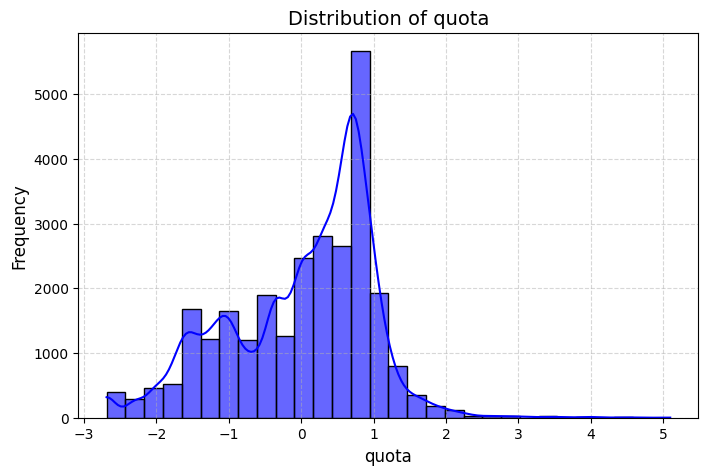

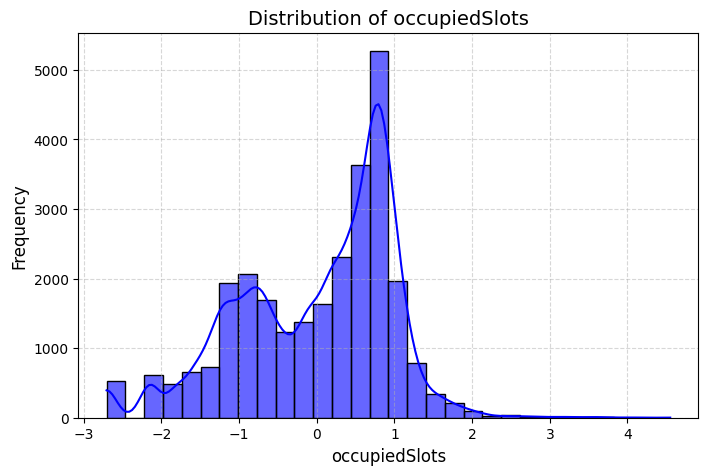

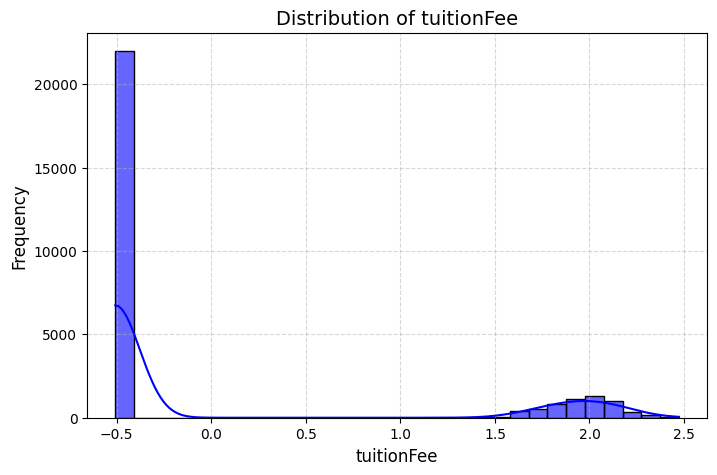

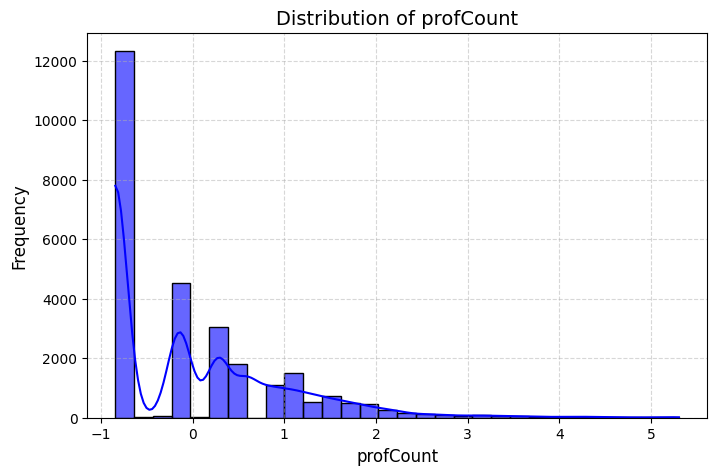

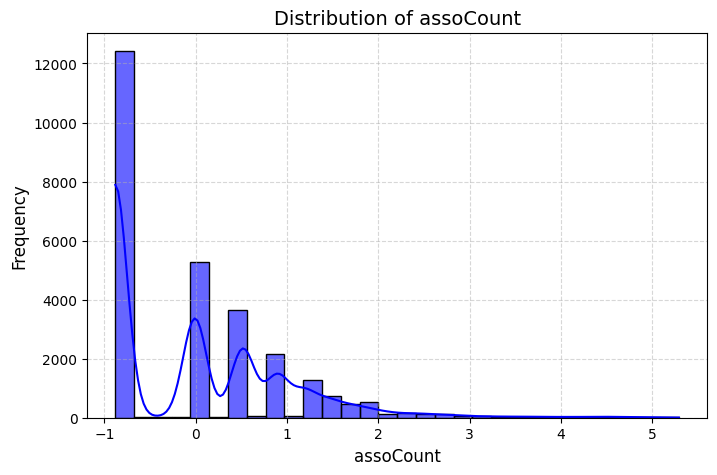

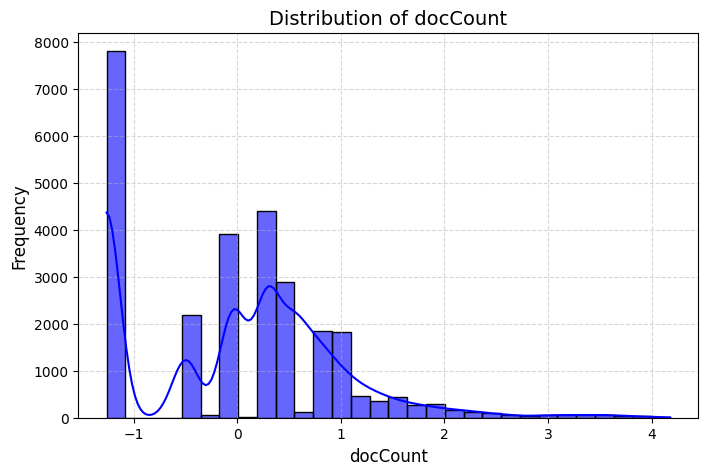

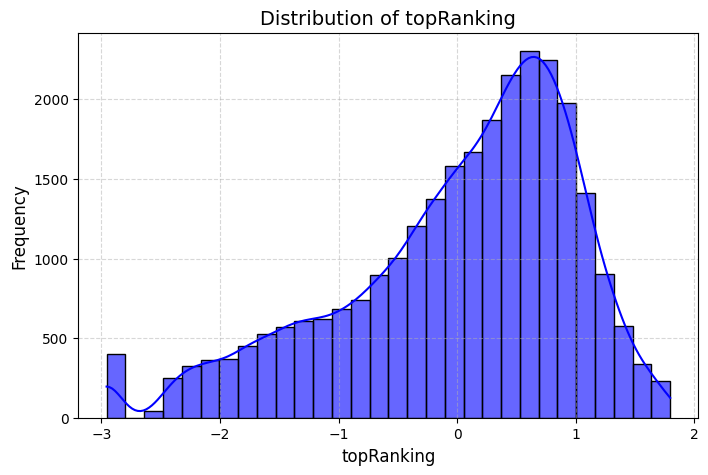

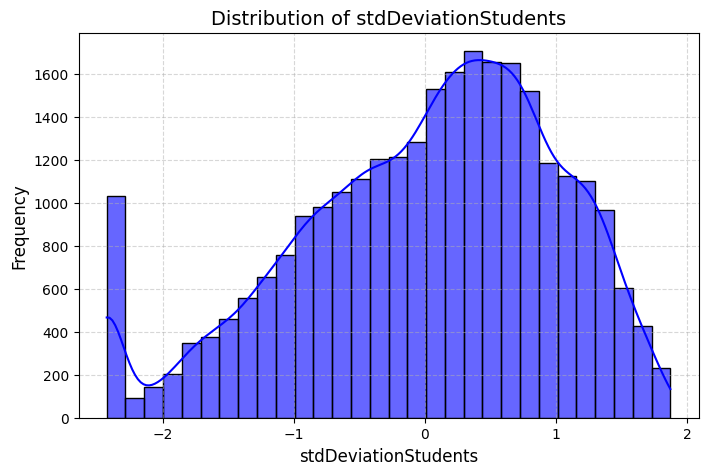

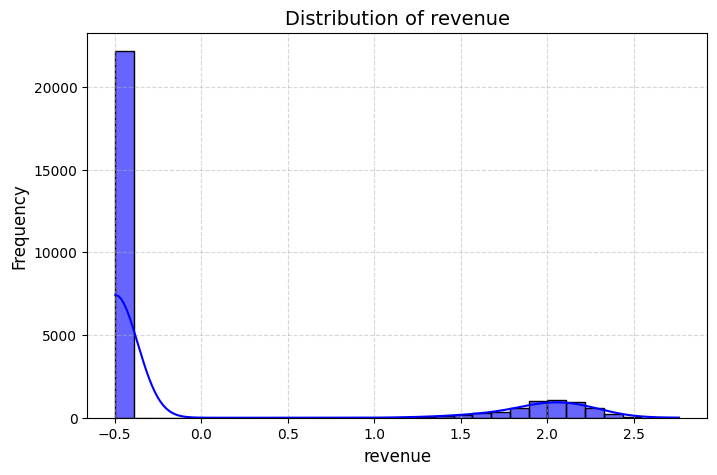

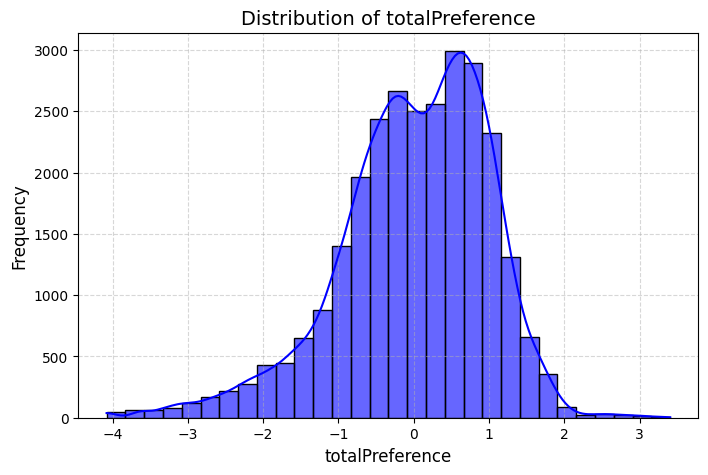

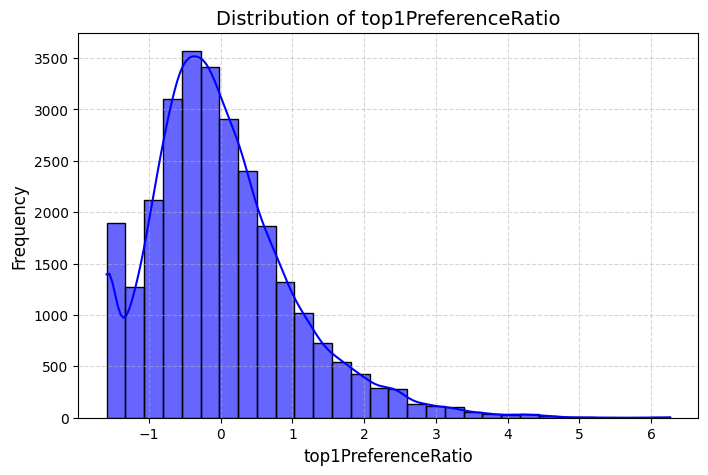

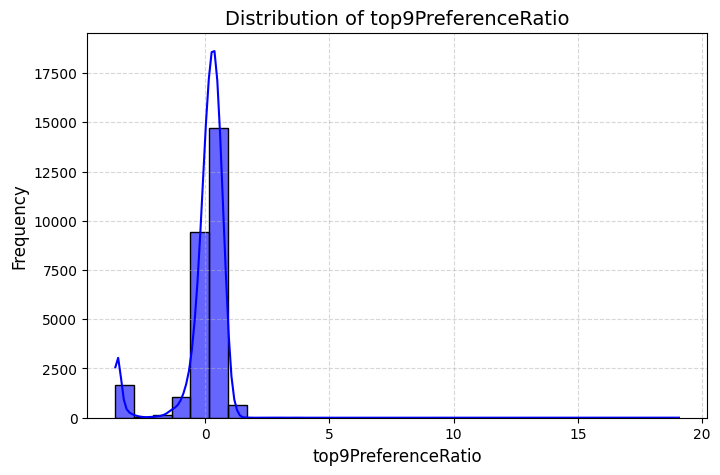

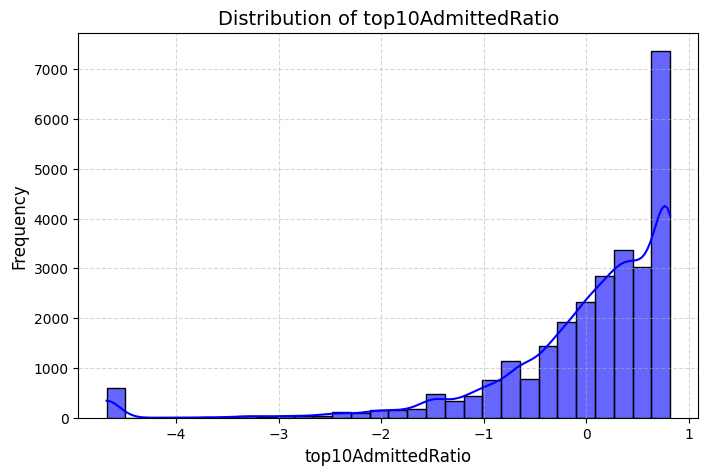

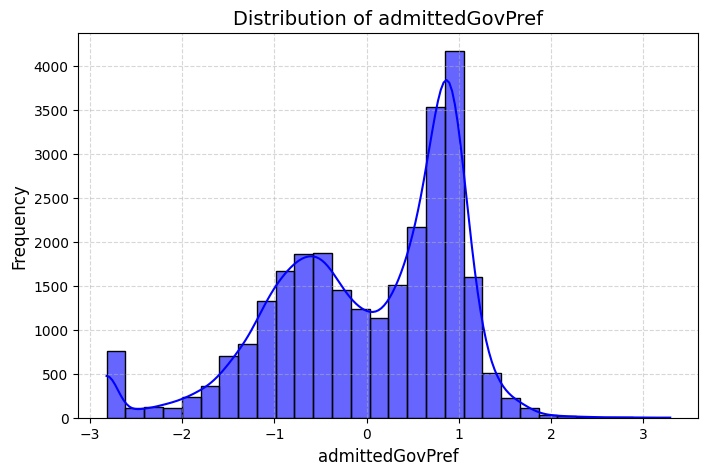

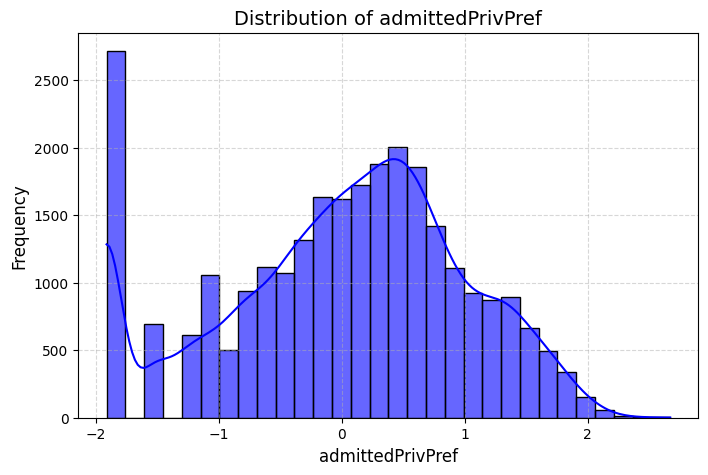

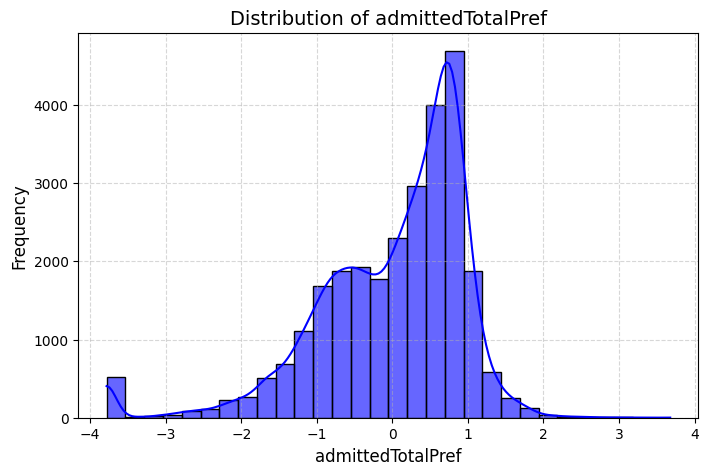

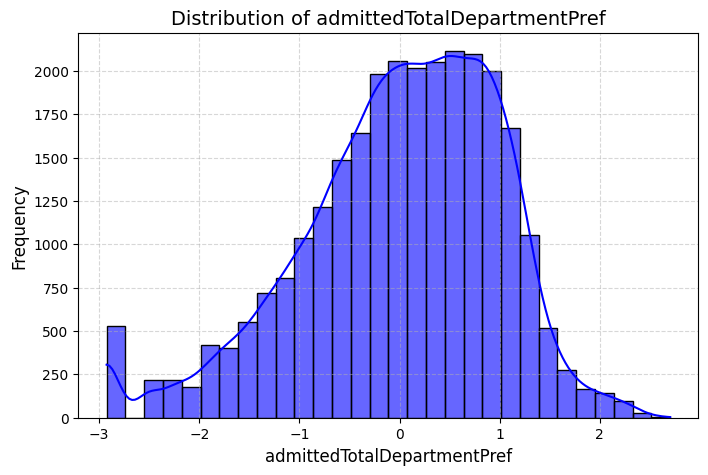

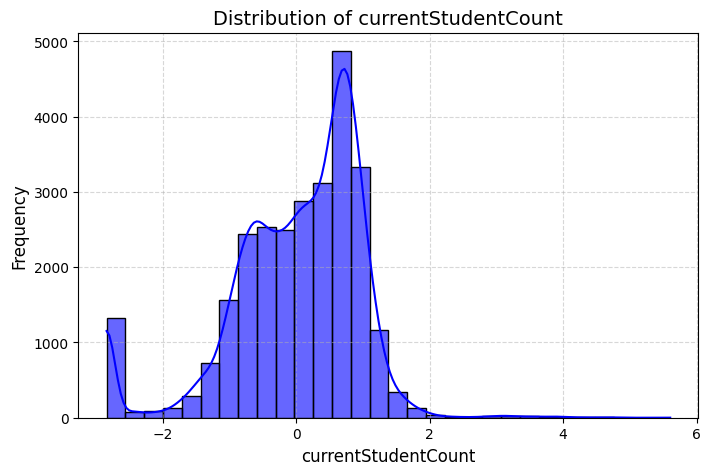

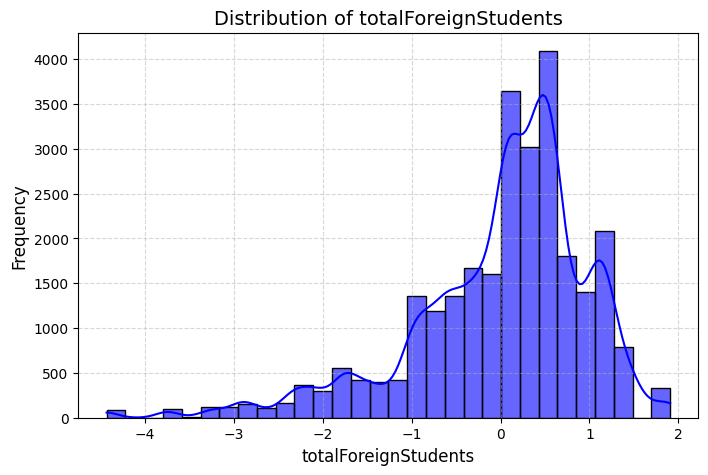

In [12]:
plot_skewed_features(processed_df, skew_features)

In [131]:

# Split data by academic year
df_2021 = df[df['academicYear'] == 2021]
df_2022 = df[df['academicYear'] == 2022]

# Filter rows based on common IDs
common_ids = set(df_2021['idOSYM']).intersection(set(df_2022['idOSYM']))

df_2021_filtered = df_2021[df_2021['idOSYM'].isin(common_ids)].sort_values(by='idOSYM')
df_2022_filtered = df_2022[df_2022['idOSYM'].isin(common_ids)].sort_values(by='idOSYM')

# Prepare X and y
X = df_2021_filtered.drop(columns=['academicYear', 'idOSYM'])
y = df_2022_filtered['baseRanking']

# Check for missing values
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

# Display shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Missing values in X: 0
Missing values in y: 0
Shape of X: (8632, 79)
Shape of y: (8632,)


In [132]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
import numpy as np

# Define pipelines for different regression models
def build_pipeline_random_forest():
    pipeline = Pipeline([
        ('model', RandomForestRegressor(random_state=42))
    ])
    return pipeline

def build_pipeline_linear():
    pipeline = Pipeline([
        ('model', LinearRegression())
    ])
    return pipeline

def build_pipeline_ridge():
    pipeline = Pipeline([
        ('model', Ridge())
    ])
    return pipeline

def build_pipeline_lasso():
    pipeline = Pipeline([
        ('model', Lasso())
    ])
    return pipeline

def build_pipeline_svr():
    pipeline = Pipeline([
        ('model', SVR())
    ])
    return pipeline

def build_pipeline_gradient_boosting():
    pipeline = Pipeline([
        ('model', GradientBoostingRegressor(random_state=42))
    ])
    return pipeline

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Define fine-tune functions for each model
def tune_hyperparameters_random_forest(pipeline, X_train, y_train):
    param_distributions = {
        'model__n_estimators': [100, 200, 300, 400, 500],
        'model__max_depth': [10, 20, 30, 40, 50],
        'model__min_samples_split': [2, 5, 10, 15, 20]
    }
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        n_iter=50,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_, random_search.best_params_

def tune_hyperparameters_ridge(pipeline, X_train, y_train):
    param_distributions = {
        'model__alpha': np.logspace(-4, 4, 50)
    }
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        n_iter=50,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_, random_search.best_params_

def tune_hyperparameters_lasso(pipeline, X_train, y_train):
    param_distributions = {
        'model__alpha': np.logspace(-4, 4, 50)
    }
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        n_iter=50,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_, random_search.best_params_

def tune_hyperparameters_svr(pipeline, X_train, y_train):
    param_distributions = {
        'model__C': np.logspace(-3, 3, 50),
        'model__epsilon': np.logspace(-3, 3, 50),
        'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        n_iter=50,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_, random_search.best_params_

def tune_hyperparameters_gradient_boosting(pipeline, X_train, y_train):
    param_distributions = {
        'model__n_estimators': [100, 200, 300, 400, 500],
        'model__learning_rate': np.logspace(-3, 0, 50),
        'model__max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
    }
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        n_iter=50,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_, random_search.best_params_

# Example usage
# Assuming you have X_train, y_train data
# pipeline_rf = build_pipeline_random_forest()
# best_estimator_rf, best_params_rf = tune_hyperparameters_random_forest(pipeline_rf, X_train, y_train)

In [ ]:

from sklearn.model_selection import GridSearchCV
import numpy as np

# Define fine-tune functions for each model using GridSearchCV
def tune_hyperparameters_random_forest_grid(pipeline, X_train, y_train):
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

def tune_hyperparameters_ridge_grid(pipeline, X_train, y_train):
    param_grid = {
        'model__alpha': np.logspace(-4, 4, 10)
    }
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

def tune_hyperparameters_lasso_grid(pipeline, X_train, y_train):
    param_grid = {
        'model__alpha': np.logspace(-4, 4, 10)
    }
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

def tune_hyperparameters_svr_grid(pipeline, X_train, y_train):
    param_grid = {
        'model__C': np.logspace(-3, 3, 10),
        'model__epsilon': np.logspace(-3, 3, 10),
        'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

def tune_hyperparameters_gradient_boosting_grid(pipeline, X_train, y_train):
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': np.logspace(-3, 0, 10),
        'model__max_depth': [3, 4, 5, 6]
    }
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Example usage
# Assuming you have X_train, y_train data
# pipeline_rf = build_pipeline_random_forest()
# best_estimator_rf, best_params_rf = tune_hyperparameters_random_forest_grid(pipeline_rf, X_train, y_train)

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model Metrics:\nRMSE: {rmse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")
    return y_pred


## Baseline Model

In [135]:
from sklearn.model_selection import train_test_split

X_train_2021, X_test_2021, y_train_2022, y_test_2022 = train_test_split(X, y, test_size=0.2, random_state=42)


base_model = LinearRegression()
base_model.fit(X_train_2021, y_train_2022)

y_pred_base = base_model.predict(X_test_2021)

evaluate_model(base_model, X_test_2021, y_test_2022)



Model Metrics:
RMSE: 113.6471, MAE: 70.1823, R^2: 0.7747


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


array([172.10205387, 508.48722261,  14.90858534, ...,   1.67558053,
       200.39573327,   3.57554677])

In [136]:

# Train a Random Forest model
complex_model = RandomForestRegressor(random_state=42, n_estimators=100)
complex_model.fit(X_train_2021, y_train_2022)
# Predict on test data
y_pred_complex = complex_model.predict(X_test_2021)
# Calculate metrics
evaluate_model(complex_model, X_test_2021, y_test_2022)


Model Metrics:
RMSE: 96.3224, MAE: 46.8927, R^2: 0.8382


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


array([115.67763  , 465.3358026,  17.53494  , ...,   4.62291  ,
       191.26119  ,  18.4879   ])

## Fine-Tune Model

In [137]:
# Train a Random Forest model
pipeline_random = build_pipeline_random()
pipeline_random, best_params_random = tune_hyperparameters(pipeline_random, X_train_2021, y_train_2022)
print("Best Hyperparameters (Random Forest):", best_params_random)
y_pred_2022 = evaluate_model(pipeline_random, X_test_2021, y_test_2022)

/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters (Random Forest): {'model__max_depth': 20, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Model Metrics:
RMSE: 96.2229, MAE: 46.7986, R^2: 0.8385


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Visualize

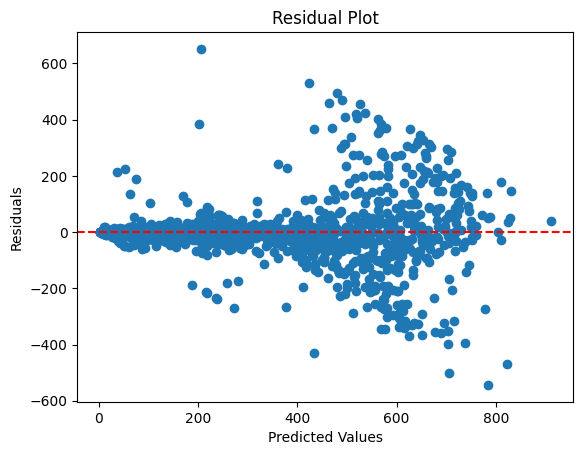

In [149]:
# Residual plot
import matplotlib.pyplot as plt
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

plot_residuals(y_test_2022, y_pred_2022)

In [139]:

# Split data for 2022 and 2023
df_2022 = df[df['academicYear'] == 2022]
df_2023 = df[df['academicYear'] == 2023]

# Filter rows based on common IDs between 2022 and 2023
common_ids_2022_2023 = set(df_2022['idOSYM']).intersection(set(df_2023['idOSYM']))

df_2022_filtered = df_2022[df_2022['idOSYM'].isin(common_ids_2022_2023)].sort_values(by='idOSYM')
df_2023_filtered = df_2023[df_2023['idOSYM'].isin(common_ids_2022_2023)].sort_values(by='idOSYM')

print("Shape of 2022 data:", df_2022_filtered.shape)
print("Shape of 2023 data:", df_2023_filtered.shape)

# Prepare X_2022 and y_2023
X_2022 = df_2022_filtered.drop(columns=['baseRanking', 'academicYear', 'idOSYM'])
y_2023 = df_2023_filtered['baseRanking']

X_train_2022, X_test_2022, y_train_2023, y_test_2023 = train_test_split(X_2022, y_2023, test_size=0.2, random_state=42)


Shape of 2022 data: (8991, 81)
Shape of 2023 data: (8991, 81)


In [140]:
# Train a Random Forest model
pipeline_random, best_params_random_2022 = tune_hyperparameters(pipeline_random, X_train_2022, y_train_2023)
print("Best Hyperparameters (Random Forest):", best_params_random_2022)
y_pred_2023 = evaluate_model(pipeline_random, X_test_2022, y_test_2023)

Best Hyperparameters (Random Forest): {'model__max_depth': 30, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Model Metrics:
RMSE: 111.2139, MAE: 53.0127, R^2: 0.7958


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


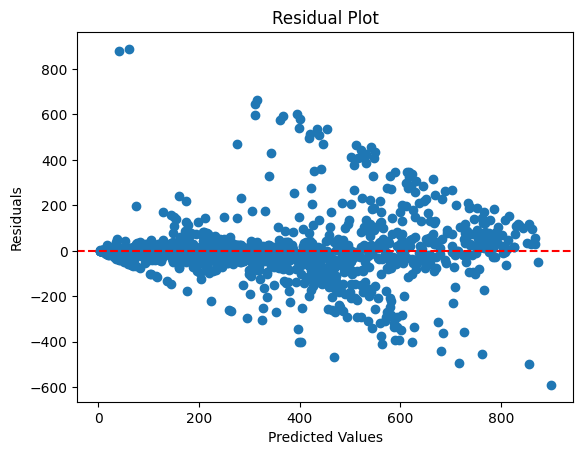

In [150]:
plot_residuals(y_test_2023, y_pred_2023)

## Feature Selection 2022 Prediction

In [142]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model_feature = RandomForestRegressor(random_state=42)
model_feature.fit(X_train, y_train)

# Get feature importance
feature_importances = model_feature.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

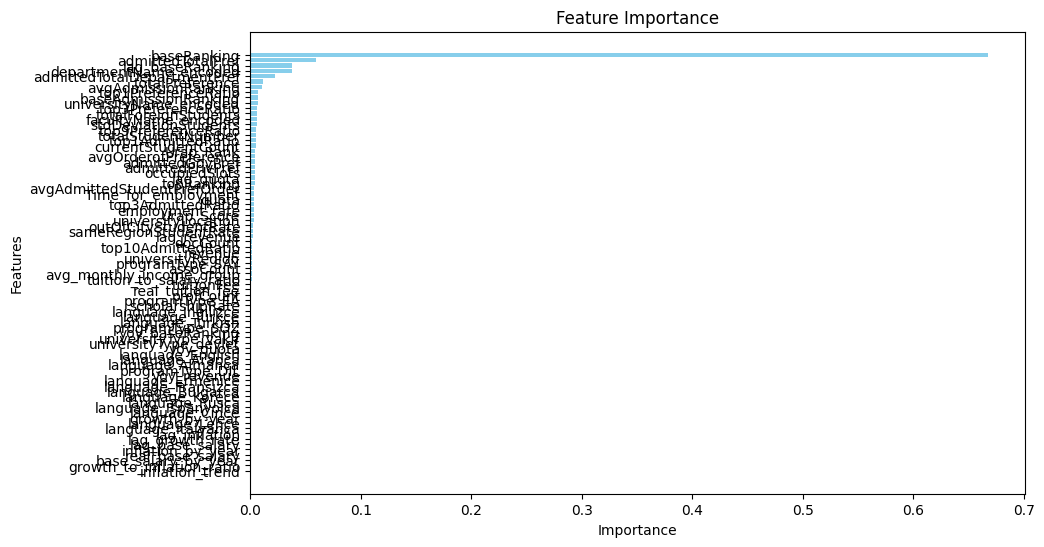

                        Feature  Importance
9                   baseRanking    0.667769
26            admittedTotalPref    0.059482
65              lag_baseRanking    0.038276
63       departmentName_encoded    0.038024
27  admittedTotalDepartmentPref    0.022263
15              totalPreference    0.011752
39          avgAdmissionRanking    0.010459
16          top1PreferenceRatio    0.007431
40         baseAdmissionRanking    0.007336
62       universityName_encoded    0.006770


In [143]:

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

# Print top 30 most important features
print(importance_df.head(10))

In [144]:
## Use most important features


# Split data by academic year
df_2021 = df[df['academicYear'] == 2021]
df_2022 = df[df['academicYear'] == 2022]

# Filter rows based on common IDs
common_ids = set(df_2021['idOSYM']).intersection(set(df_2022['idOSYM']))

df_2021_filtered = df_2021[df_2021['idOSYM'].isin(common_ids)].sort_values(by='idOSYM')
df_2022_filtered = df_2022[df_2022['idOSYM'].isin(common_ids)].sort_values(by='idOSYM')

# Select the top 30 features
top_features = importance_df['Feature'][:30].tolist()

# Filter the dataset to include only the top features
df_2021_filtered_top = df_2021_filtered[top_features]

# Prepare X and y
X = df_2021_filtered_top
y = df_2022_filtered['baseRanking']

# Check for missing values
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

# Display shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Missing values in X: 0
Missing values in y: 0
Shape of X: (8632, 30)
Shape of y: (8632,)


In [145]:
# Split data for training and testing
X_train_2021_top, X_test_2021_top, y_train_2022_top, y_test_2022_top = train_test_split(X, y, test_size=0.2, random_state=42)
# Trin a Random Forest model with top features
pipeline_random_top = build_pipeline_random()
pipeline_random_top, best_params_random_top = tune_hyperparameters(pipeline_random_top, X_train_2021_top, y_train_2022_top)
print("Best Hyperparameters (Random Forest):", best_params_random_top)
y_pred_2022_top = evaluate_model(pipeline_random_top, X_test_2021_top, y_test_2022_top)


Best Hyperparameters (Random Forest): {'model__max_depth': 30, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Model Metrics:
RMSE: 96.8476, MAE: 47.4553, R^2: 0.8364


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## PCA

In [146]:
# Aplly PCA to reduce the dimensionality of the dataset
from sklearn.decomposition import PCA
# Define a function to reduce components based on 90% variance threshold
def reduce_pca_components(feature_set, variance_threshold=0.98):
    pca = PCA()
    reduced_pca = pca.fit_transform(feature_set)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance >= variance_threshold) + 1
    print(f"Number of components to explain {variance_threshold*100}% variance: {n_components}")
    return pca.transform(feature_set)[:, :n_components], pca , n_components



In [147]:

# Split data by academic year
df_2021_pca = df[df['academicYear'] == 2021]
print(df_2021.shape)


(8656, 81)


In [148]:
X_pca, pca, n_components = reduce_pca_components(df_2021)
print("Shape of X after PCA:", X_pca.shape)

Number of components to explain 98.0% variance: 1
Shape of X after PCA: (8656, 1)
